## Visualization with Project 

This project will demonstrate the skills acquired throughout the course by working on two key parts: **data visualization** and **interactive dashboards**. 

### **Part 1: Visualizations using Matplotlib, Seaborn, and Folium**

Part 1 uses popular visualization libraries to explore trends and patterns in automobile sales data across different time periods.It consists of tasks involving line charts, bubble plots, pie charts, and scatter plots to compare metrics like vehicle sales, recession impacts, advertising expenditure, and economic indicators. 

Key tasks include:  
- Developing line charts to visualize automobile sales fluctuations across years and vehicle types.  
- Comparing sales trends during **recession** and **non-recession** periods using **Seaborn**.  
- Analyzing the correlation between **vehicle prices** and **sales volume** using **Matplotlib**.  
- Creating **pie charts** to visualize advertising expenditure by vehicle type and period.  
- Developing **GDP** comparison plots and **bubble plots** to show seasonal trends and economic factors.  

---

### **Part 2: Dashboards using Plotly and Dash**  

Part 2 creates a **Plotly Dash dashboard** to display key insights interactively. It involves setting up the dashboard, adding drop-down menus, creating dynamic callbacks, and presenting graphs to explore trends in automobile sales. 

Key tasks include:  
- Creating a **Dash application** with meaningful titles.  
- Adding **drop-down menus** for interactive data filtering.  
- Defining **callbacks** to update dashboard elements dynamically.  
- Displaying graphs with insights on **recession** and **yearly statistics**.  

---

### **Evaluation and Peer Grading**  
This assignment will evaluate the work based on the completeness and quality of visualizations and dashboards.

The goal of the project is not only to test the ability to create compelling visualizations but build interactive dashboards that offer meaningful insights.The project will demonstrate the expertise in applying data science tools to **analyze trends, patterns, and relationships** across datasets.

In [31]:
!pip install folium # install the Folium  library

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df = pd.read_csv(URL)
print('Data downloaded and read into a dataframe!')

  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/ae/6d/18a7546e1748ecdd6ed7cd00d3f183faf1df08bd4f5e5e0eb3e72458b862/folium-0.17.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/fc/be/720f85abacd654ec86f1431bc7c004eae74417bd9d0e7a2bc43601062627/branca-0.8.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/108.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/108.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/108.4 kB ? eta -:--:--
   ----------- --------------------------- 30.7/108.4 kB 325.1 kB/s eta 0:00:01
   -------------- ------------------------ 41.0/108.4 kB 326.8 kB/s eta 0:00:01
   ----------------------------------- -- 102.4/108.4 kB 590.8 kB/s eta 0:00:01
   -------------------------------------- 108.4/108.4 kB 522.2 kB/s eta 0:00:00
Data downloaded and read into a dataframe!


To prepare **Exploratory Data Analysis (EDA)** after reading the `historical_automobile_sales.csv` file into a DataFrame, you can use several **Pandas** and **Seaborn/Matplotlib** functions. Here's a step-by-step guide with the most useful functions, categorized by purpose:

---

## **Step-by-Step EDA Functions**

### 1. **Understand the Data Structure**
- **`df.head()`** – View the first 5 rows to get a sense of the data.
- **`df.tail()`** – View the last 5 rows (useful to spot data inconsistencies).
- **`df.shape`** – Check the number of rows and columns.
- **`df.info()`** – Get information about the data types and missing values.
- **`df.columns`** – List all column names to understand what features are available.

---

### 2. **Identify Data Types & Missing Values**
- **`df.dtypes`** – Check the data type of each column.
- **`df.isnull().sum()`** – Identify the total number of missing values per column.
- **`df.dropna()` / `df.fillna()`** – Handle missing values by dropping or filling them.

---

### 3. **Descriptive Statistics**
- **`df.describe()`** – Get statistical summaries for numerical features (mean, std, etc.).
- **`df.describe(include='object')`** – Get summaries for categorical features (like counts, top values).
- **`df.nunique()`** – Identify the number of unique values in each column.

---

### 4. **Analyze Categorical Data**
- **`df['column_name'].value_counts()`** – Count occurrences of each unique value in a column (e.g., vehicle types or regions).
- **`df.groupby('column_name').size()`** – Group data by categorical features to check distributions.

---

### 5. **Analyze Correlations and Relationships**
- **`df.corr()`** – Calculate the correlation matrix to identify relationships between numerical variables.
- **`sns.heatmap(df.corr(), annot=True, cmap='coolwarm')`** – Visualize the correlation matrix using a heatmap.
- **`pd.plotting.scatter_matrix(df)`** – Create a scatter plot matrix for pairwise relationships.

---

### 6. **Visualize Data Trends and Patterns**
- **`df.plot()`** – Quick overview of trends using line plots.
- **`sns.pairplot(df)`** – Visualize pairwise relationships with histograms and scatter plots.
- **`sns.boxplot(data=df, x='column_name', y='price')`** – Identify outliers using box plots.
- **`sns.countplot(x='column_name', data=df)`** – Plot frequency of categorical values.

---

### 7. **Time Series Analysis (if applicable)**
- **`df['date_column'] = pd.to_datetime(df['date_column'])`** – Convert date columns to `datetime` format.
- **`df.set_index('date_column').plot()`** – Plot time series data to observe trends and seasonality.

---

### 8. **Handling Outliers**
- **`df.quantile([0.05, 0.95])`** – Identify the 5th and 95th percentiles for outlier detection.
- **`sns.boxplot(df['numerical_column'])`** – Visualize outliers.

---

### 9. **Create Custom Metrics and Features**
- **`df['new_column'] = df['existing_column'] / df['another_column']`** – Feature engineering by creating new metrics.
- **`df['month'] = df['date_column'].dt.month`** – Extract useful information from dates, such as month or year.

---

### 10. **Geospatial Analysis (if applicable)**
- **`import folium`** – Use Folium for interactive maps.
- **`map = folium.Map(location=[latitude, longitude], zoom_start=12)`** – Create a base map.
- **`for index, row in df.iterrows(): folium.Marker([row['lat'], row['long']], popup=row['name']).add_to(map)`** – Add data points to the map.

---

### 11. **Export Data (for further analysis)**
- **`df.to_csv('cleaned_data.csv', index=False)`** – Save the cleaned and prepared data.

---

## **Importance (The Why)**
These functions allow you to **explore** and **visualize** the data, identify **patterns**, handle **missing values**, and **engineer features**. With EDA, you can detect relationships, outliers, or trends in the data, which helps you build better predictive models in subsequent steps.

This step-by-step process will lay a solid foundation for your **data science pipeline** and allow you to **gain insights** efficiently from the given automobile sales data.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     528 non-null    object 
 1   Year                     528 non-null    int64  
 2   Month                    528 non-null    object 
 3   Recession                528 non-null    int64  
 4   Consumer_Confidence      528 non-null    float64
 5   Seasonality_Weight       528 non-null    float64
 6   Price                    528 non-null    float64
 7   Advertising_Expenditure  528 non-null    int64  
 8   Competition              528 non-null    int64  
 9   GDP                      528 non-null    float64
 10  Growth_Rate              528 non-null    float64
 11  unemployment_rate        528 non-null    float64
 12  Automobile_Sales         528 non-null    float64
 13  Vehicle_Type             528 non-null    object 
 14  City                     5

In [34]:
df.isnull().sum()

Date                       0
Year                       0
Month                      0
Recession                  0
Consumer_Confidence        0
Seasonality_Weight         0
Price                      0
Advertising_Expenditure    0
Competition                0
GDP                        0
Growth_Rate                0
unemployment_rate          0
Automobile_Sales           0
Vehicle_Type               0
City                       0
dtype: int64

In [32]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


<Axes: >

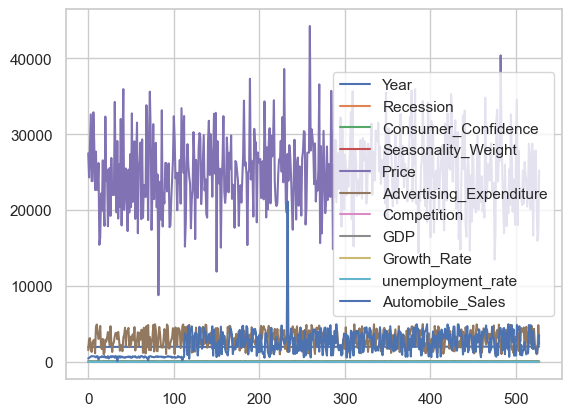

In [41]:
df.plot()

**TASK 1.1:** Develop a *Line chart* using the functionality of pandas to show how automobile sales fluctuate from year to year. 

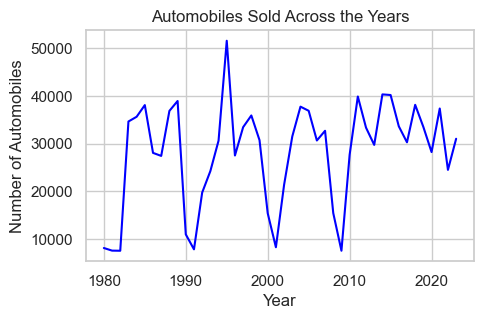

In [80]:
# Grouping data by year and calculating total automobile sales per year
temp = df.groupby("Year")["Automobile_Sales"].sum()

# Plotting a line chart to visualize yearly automobile sales
temp.plot(x="Year", y="Automobile_Sales", kind="line", figsize=(5, 3), color='blue')

# Adding title and axis labels
plt.title("Automobiles Sold Across the Years")
plt.xlabel("Year")
plt.ylabel("Number of Automobiles")
plt.grid(True)  # Adding gridlines for better visualization
plt.show()


The line chart displays how automobile sales have fluctuated over the years.

**Trend Observations:**
Some years may show significant spikes or drops in sales, potentially due to economic factors like recessions, market trends, or policy changes.

Periods with sustained growth might indicate economic stability or increased consumer demand for automobiles.
A sharp decline could correspond to economic downturns (e.g., recessions) or disruptions such as supply chain issues or pandemics.

By identifying these patterns, businesses can align their strategies with market trends, manage inventory better, and predict future demand more accurately.

**TASK 1.2:** Plot different lines for categories of vehicle type and analyse the trend to answer the question "Is there a noticeable difference in sales trends between different vehicle types during recession periods?" 

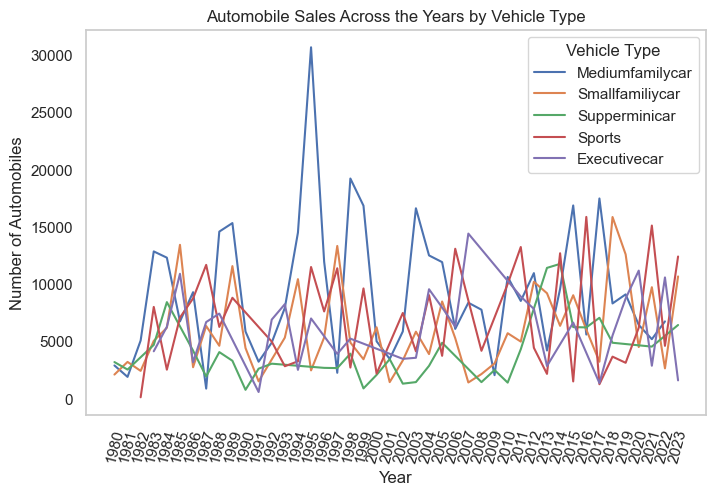

In [83]:
# Grouping by Year and Vehicle Type to get total automobile sales per type each year
temp = df.groupby(["Year", "Vehicle_Type"])[["Automobile_Sales"]].sum().reset_index()

# Setting Year as the index for plotting purposes
temp.set_index("Year", inplace=True)

# Plotting multiple lines for each vehicle type
plt.figure(figsize=(8, 5))  # Adjusting the figure size
for vehicle_type in temp["Vehicle_Type"].unique():
    plt.plot(temp.loc[temp["Vehicle_Type"] == vehicle_type].index, 
             temp.loc[temp["Vehicle_Type"] == vehicle_type]["Automobile_Sales"], 
             label=vehicle_type)

# Adding x-ticks, grid, title, and labels
plt.xticks(list(range(df.Year.unique().min(), df.Year.unique().max() + 1)), rotation=75)
plt.grid()
plt.title("Automobile Sales Across the Years by Vehicle Type")
plt.xlabel("Year")
plt.ylabel("Number of Automobiles")
plt.legend(title="Vehicle Type")  # Adding a legend for clarity
plt.show()


**Trend Comparison:** 
 The plot reveals distinct sales trends for different vehicle types over the years. 
 
**Some key patterns include:**

**Passenger vehicles** may exhibit relatively stable sales, with some drop-off during economic recessions, indicating reduced consumer spending on non-essential purchases.

**Commercial vehicles** might show smaller declines during recessions, as these vehicles are often business-related and essential for logistics and operations.

**Luxury vehicles** may display steeper drops during recessions, reflecting a sharp decline in discretionary spending.

**Impact of Recession Periods:**

During recession periods, sales of non-essential vehicle types such as luxury cars tend to decrease more sharply than essential or commercial vehicles.


**Recovery patterns may differ:** 

**commercial vehicles** may recover faster than passenger or luxury vehicles, as businesses resume operations.

This analysis provides insights into consumer behavior during economic downturns, helping businesses adjust inventory and marketing strategies based on the vehicle category.








**TASK 1.3:** Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period. 

Data downloaded and read into a DataFrame!


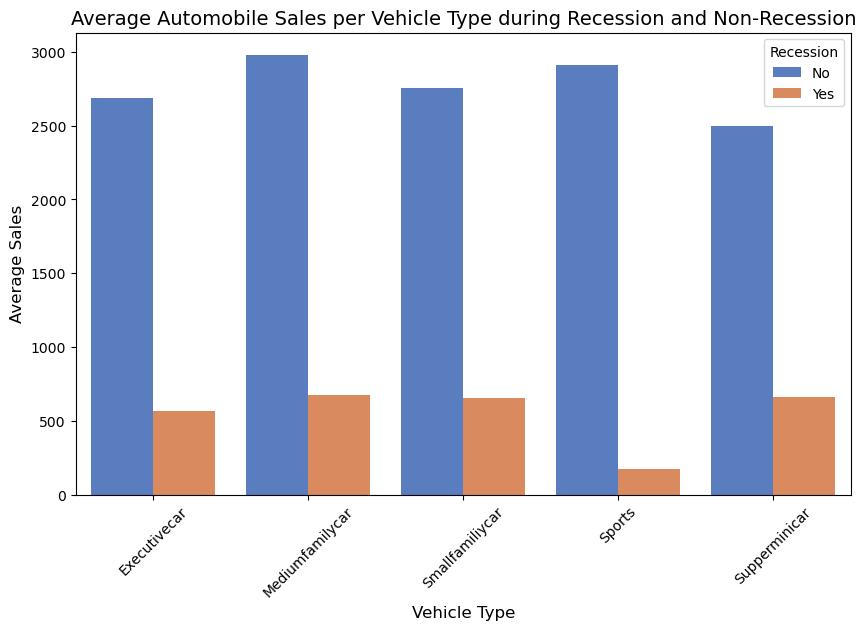

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the provided URL
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df = pd.read_csv(URL)
print('Data downloaded and read into a DataFrame!')

# Group data by Vehicle_Type and Recession, then calculate average sales
temp = df.groupby(["Vehicle_Type", "Recession"])["Automobile_Sales"].mean().reset_index()

# Replace 0/1 with meaningful labels for Recession
temp["Recession"] = temp["Recession"].replace({0: "No", 1: "Yes"})

# Plot a barplot comparing average sales per vehicle type during recession and non-recession
plt.figure(figsize=(10, 6))
sns.barplot(data=temp, x="Vehicle_Type", y="Automobile_Sales", hue="Recession", palette="muted")

# Adding labels and title
plt.xlabel('Vehicle Type', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.title('Average Automobile Sales per Vehicle Type during Recession and Non-Recession', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Recession', loc='upper right')
plt.show()


**Sales Comparison:**

The bar chart shows that average automobile sales are significantly lower during recession periods compared to non-recession periods.

This reflects the natural reduction in consumer spending during economic downturns, as individuals and businesses tend to delay or cancel large purchases like vehicles.
Impact of Economic Conditions:

The economic uncertainty during recessions results in consumers prioritizing essential expenses, causing a visible decline in vehicle purchases.
The contrast in sales trends highlights the sensitivity of the automobile industry to macroeconomic conditions.

This analysis underscores the importance of tracking economic indicators for companies in the automotive sector, helping them adjust strategies such as inventory management, pricing, and marketing campaigns based on economic cycles.

 Let's compare the sales of different vehicle types during a recession and a non-recession period

In [13]:
temp=df.groupby(["Vehicle_Type", "Recession"])["Automobile_Sales"].mean().reset_index()
temp["Recession"] = temp["Recession"].replace({0:"No", 1:"Yes"})
plt.figure(figsize=(10, 6))
sns.barplot(data=temp, x="Vehicle_Type", y="Automobile_Sales", hue="Recession")
plt.xlabel('VEhicle Type')
plt.ylabel('Average sales')
plt.title('Average Automobile Sales per Vehicle Type during Recession and Non-Recession')

KeyError: 'Vehicle_Type'

**TASK 1.4:** To compare the variations in GDP during recession and non-recession periods using subplots
#you can use the matplotlib library to create a grid of subplots. Here's how you can do it:

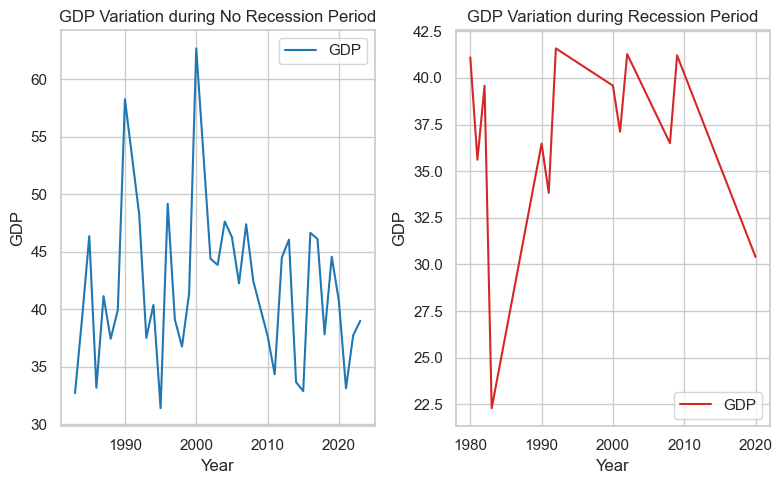

In [87]:
# Grouping data by Recession and Year, and calculating average GDP
temp = df.groupby(["Recession", "Year"])["GDP"].mean().reset_index()

# Splitting data into recession and non-recession periods
no = temp[temp["Recession"] == 0]
yes = temp[temp["Recession"] == 1]

# Creating subplots to visualize GDP variations in both periods
fig = plt.figure(figsize=(8, 5))
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

# Plotting GDP for non-recession period
no.plot(x="Year", y="GDP", kind="line", ax=ax0, color='tab:blue')
ax0.set_title('GDP Variation during No Recession Period')
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')

# Plotting GDP for recession period
yes.plot(x="Year", y="GDP", kind="line", ax=ax1, color='tab:red')
ax1.set_title('GDP Variation during Recession Period')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')

plt.tight_layout()
plt.show()


**Trend Analysis:**

The GDP trends differ significantly between recession and non-recession periods.
During non-recession periods, GDP generally shows a positive trend or stable growth, indicating economic expansion or stability.
In contrast, during recession periods, the GDP either declines or fluctuates irregularly, reflecting economic contractions.

**Economic Impact:**

The decline in GDP during recessions confirms the negative impact of downturns on overall economic activity, such as reduced consumer spending, investment, and industrial production.

**Visualization Benefits:**

These subplots offer a clear comparison by isolating the GDP behavior during two contrasting economic phases, helping analysts better understand how different external events (e.g., market crises or financial policies) influence economic growth.

**TASK 1.5:** A bubble plot can effectively display the impact of seasonality on automobile sales by showing sales data with different bubble sizes representing sales values.
 Here's how you can create a bubble plot using matplotlib:

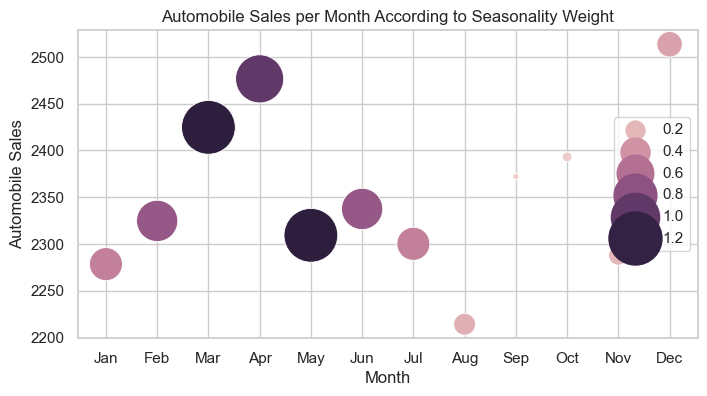

In [89]:
temp = df.copy()
months = temp["Month"].unique().tolist()

# Replace month names with numerical indices
temp["Month"] = temp["Month"].replace(dict(zip(months, range(len(months)))))

# Group by month and calculate average sales and seasonality weight
temp = temp.groupby("Month")[["Automobile_Sales", "Seasonality_Weight"]].mean().reset_index()

# Create bubble plot using Seaborn
plt.figure(figsize=(8, 4))
plt.xticks(ticks=range(len(months)), labels=months)  # Show month names on x-axis
sns.scatterplot(
    data=temp,
    x='Month',
    y='Automobile_Sales',
    hue="Seasonality_Weight",
    size="Seasonality_Weight",  # Use size to reflect seasonality weight
    sizes=(20, 1500)  # Define bubble size range
)
plt.xlabel("Month")
plt.ylabel("Automobile Sales")
plt.title("Automobile Sales per Month According to Seasonality Weight")
plt.legend(loc="right")
plt.show()

**Seasonal Impact on Sales:**

**The bubble plot** reveals fluctuations in automobile sales throughout the year, with sales varying across different months.
Months with higher seasonality weights tend to correspond to larger bubbles, indicating that certain periods (e.g., holidays, summer) have a significant impact on sales.

**Identification of Peak and Low Seasons:**

**Large bubbles** indicate peak seasons where automobile sales increase due to higher demand (e.g., summer vacations or holiday periods).

**Smaller bubbles** reflect low seasons, such as months where consumer spending on cars is limited.

**Usefulness for Business Strategy:**

Understanding these seasonal patterns can help businesses optimize their sales strategy, such as focusing on advertising or promotions during peak seasons.
This insight is crucial for inventory management and marketing planning, ensuring efficient resource allocation across the year.







**TASK 1.6:** To develop a scatter plot to identify the correlation between the average vehicle price and sales volume during recessions using Matplotlib
There is a need to have a dataset with columns for 'Year', 'Average_Price', 'Sales', and information about recession years. Here's how you can create the scatter plot:

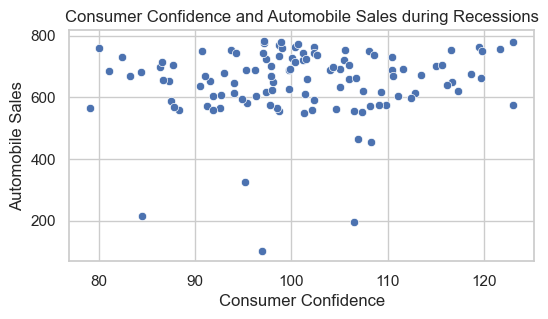

In [91]:
plt.figure(figsize=(6, 3))
sns.scatterplot(
    data=df[df["Recession"] == 1], 
    x='Consumer_Confidence', 
    y='Automobile_Sales'
)
plt.title("Consumer Confidence and Automobile Sales during Recessions")
plt.xlabel("Consumer Confidence")
plt.ylabel("Automobile Sales")
plt.show()

**Positive Correlation Insight:**

If the scatter plot shows an upward trend (dots moving diagonally from bottom left to top right), it suggests a positive correlation between consumer confidence and automobile sales during recessions. In other words, when consumers are more confident, they are more likely to purchase automobiles, even in tough economic times.
Variability in Sales:

The spread of the points along the y-axis may indicate variability in how consumer confidence translates into automobile sales. Some high-confidence periods may still result in low sales, possibly due to other factors (e.g., high interest rates or unemployment).

**Impact of Economic Conditions:**

If no clear trend is visible (a random scatter of points), it suggests that consumer confidence alone may not be a reliable predictor of automobile sales during recessions. External factors like credit availability and incentives might play a bigger role.

**Business Implication:**

For companies, tracking consumer confidence can still be a useful metric to anticipate shifts in demand during recessions, though additional indicators may need to be considered for a comprehensive view.

How does the average vehicle price relate to the sales volume during recessions?

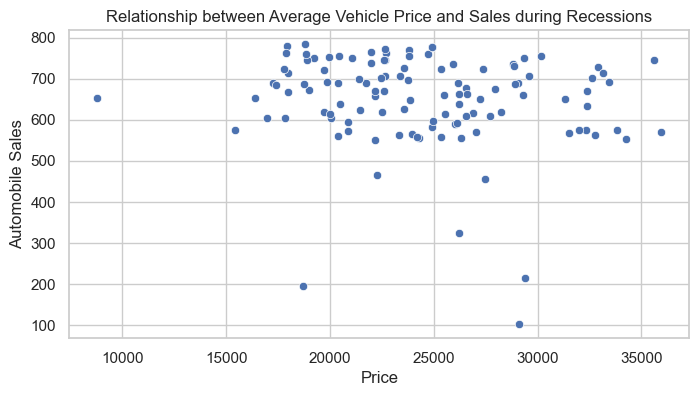

In [63]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df[df["Recession"]==1], x='Price', y='Automobile_Sales')
plt.title("Relationship between Average Vehicle Price and Sales during Recessions")
plt.xlabel("Price")
plt.ylabel("Automobile Sales")
plt.show()

**TASK 1.7:** To create a pie chart displaying the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods
you can use the matplotlib library. Here's how you can do it:

No Recession    0.790129
Recession       0.209871
Name: Advertising_Expenditure, dtype: float64

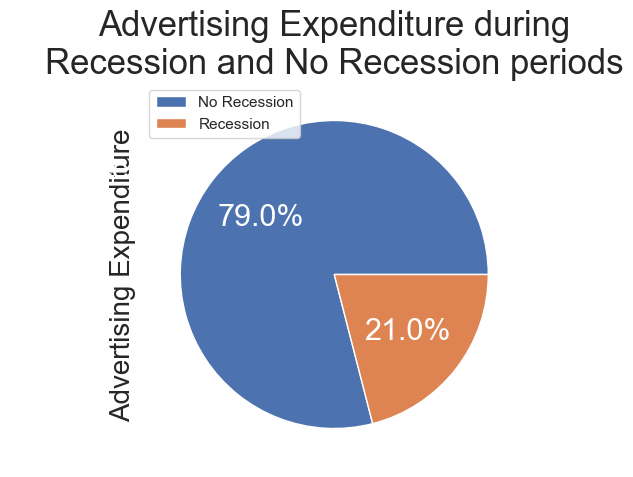

In [96]:
temp = df.groupby("Recession")["Advertising_Expenditure"].sum() / df["Advertising_Expenditure"].sum()
temp.index = ["No Recession", "Recession"]
display(temp)

temp.plot(
    kind="pie",
    figsize=(7, 5),
    autopct='%1.1f%%',
    textprops={'color': "w", "size": 22}
)
plt.ylabel("Advertising Expenditure", fontsize=20)
plt.title("Advertising Expenditure during\nRecession and No Recession periods", fontsize=25)
plt.legend(fontsize=11)
plt.show()

**Distribution of Advertising Expenditure:**

The pie chart shows how advertising budgets are allocated during recession and non-recession periods. For example, if a significant portion of the expenditure occurs during recessions, it could indicate that XYZAutomotives tries to stimulate demand by investing more in marketing during tough economic times.

**Higher Spending in Non-Recession Periods:**

If the pie chart indicates a higher percentage of advertising during non-recession periods, it suggests that the company focuses on capitalizing on favorable market conditions when consumers are more willing to spend.

**Balanced Approach:**

A near-equal distribution would indicate a strategic balance, suggesting that the company maintains consistent brand visibility regardless of economic cycles.

**Business Implications:**

Understanding advertising trends during economic downturns can help companies optimize their future marketing budgets. For instance, if spending during recessions yields strong returns, XYZAutomotives could maintain or even increase future advertising investments during downturns to gain a competitive edge.

**TASK 1.8:** To create a pie chart displaying the total advertising expenditure for each vehicle type during a recession period
you can use the matplotlib library. Here's how you can do it:


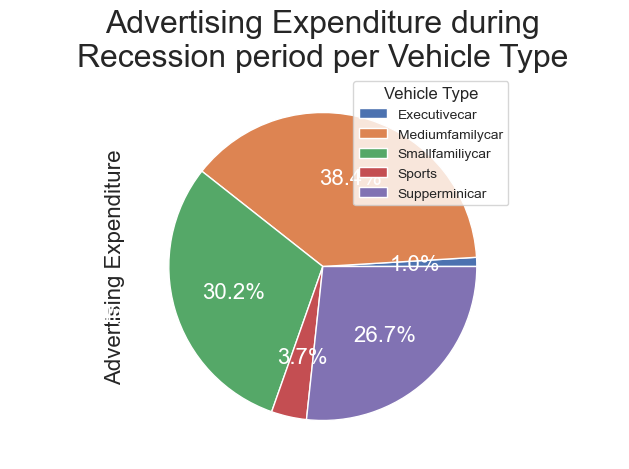

In [102]:
temp = df[df["Recession"] == 1].groupby("Vehicle_Type")["Advertising_Expenditure"].sum()

temp.plot(
    kind="pie",
    figsize=(7, 5),
    autopct='%1.1f%%',
    textprops={'color': "w", "size": 16}
)

plt.ylabel("Advertising Expenditure", fontsize=16)
plt.title("Advertising Expenditure during\nRecession period per Vehicle Type", fontsize=23)
plt.legend(title="Vehicle Type", loc="best", fontsize=10)
plt.show()

**TASK 1.9:** To analyze the effect of the unemployment rate on vehicle type and sales during the recession period
you can use the seaborn library to create a countplot. Here's how you can do it:

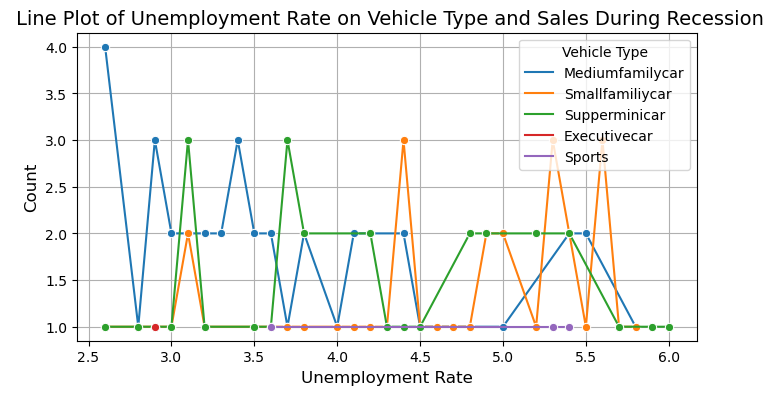

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from the URL
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df = pd.read_csv(URL)

# Filter data for recession period
recession_data = df[df["Recession"] == 1]

# Group data by unemployment rate and vehicle type, and count occurrences
temp = recession_data.groupby(["unemployment_rate", "Vehicle_Type"]).size().reset_index(name='Count')

# Create a line plot for unemployment rate vs vehicle type counts
plt.figure(figsize=(8, 4))
sns.lineplot(data=temp, x="unemployment_rate", y="Count", hue="Vehicle_Type", marker="o", palette="tab10")

# Add labels, title, and legend
plt.xlabel("Unemployment Rate", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title(" Line Plot of Unemployment Rate on Vehicle Type and Sales During Recession", fontsize=14)
plt.legend(title="Vehicle Type", loc="upper right")
plt.grid(True)

# Display the plot
plt.show()


## Part 2

**TASK 2.1:** Create a Dash application and give it a meaningful title. 

**TASK 2.2:** Add drop-downs to your dashboard with appropriate titles and options. 

**TASK 2.3:** Add a division for output display with appropriate 'id' and 'classname' property. 

**TASK 2.4:** Creating Callbacks; Define the callback function to update the input container. 

**TASK 2.5:** Create and display graphs for Recession Report Statistics. 

**TASK 2.6:** Create and display graphs for Yearly Report Statistics.

**TASK 2.1:** Create a Dash application and give it a meaningful title "Automobile sales Statistics Dashboard" 

**Dash Application for Sales Data Dashboard**
This Dash app provides an interactive visualization to explore monthly sales trends using a simple line chart. Here’s how the app works:

In [29]:
# Install Dash if not already installed
!pip install dash

# Import necessary libraries
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Initialize the Dash app
app = dash.Dash(__name__)
app.title = "Automobile Sales Statistics Dashboard"  # App title in browser tab

# Sample data for demonstration
df = pd.DataFrame({
    "Month": ["January", "February", "March", "April", "May", "June", "July", "August"],
    "Sales": [200, 150, 300, 400, 350, 450, 600, 550]
})

# Create a line chart using Plotly Express
fig = px.line(df, x="Month", y="Sales", title="Monthly Sales Trends")

# Define the layout of the app
app.layout = html.Div(children=[
    # Title with center alignment and color styling
    html.H1(
        children="Automobile Sales Statistics Dashboard",
        style={
            'textAlign': 'center',
            'color': '#2C3E50',  # Dark blue color
            'fontFamily': 'Arial, sans-serif'
        }
    ),

    # Subtitle/description text
    html.Div(
        children='This dashboard provides insights into the monthly sales trends.',
        style={'textAlign': 'center', 'marginBottom': '20px'}
    ),

    # Graph component
    dcc.Graph(
        id='sales-graph',
        figure=fig
    ),
], style={'padding': '20px'})  # Add padding for neat layout

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


### Clear Visual Presentation:

The line chart displays monthly sales trends in a clean and concise manner, providing a quick visual summary of the data.

#### Identification of Patterns:

From the chart, users can identify peaks and troughs in the sales trends. For example, July has the highest sales, while February shows the lowest. This can indicate seasonal variations affecting sales.

#### Interactive Features:

Dash allows for interactive data exploration, such as zooming into the graph or viewing data points in tooltips when the mouse hovers over the chart.

#### Scalability:

This dashboard can easily be extended by adding more graphs or widgets (e.g., dropdowns, sliders) to allow users to explore the data across different dimensions like regions or product types.

#### Decision-Making Tool:

Business users can utilize the insights from the chart to make data-driven decisions. For example, understanding peak sales months helps in planning inventory or marketing campaigns.

**TASK 2.2:** Add drop-downs to your dashboard with appropriate titles and options.

### Dash Application with Dropdowns for Region and Product Selection

This improved version of the Dash app introduces interactive dropdown menus that allow users to filter the sales trends based on region and product type. The code ensures dynamic updates to the graph based on the selected options.

In [2]:
# Install dash first if not already installed
!pip install dash

# Import necessary libraries
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Initialize the Dash app
app = dash.Dash(__name__)
app.title = "Interactive Dashboard for Sales Data"

# Sample data
df = pd.DataFrame({
    "Month": ["January", "February", "March", "April", "May", "June", "July", "August"],
    "Sales": [200, 150, 300, 400, 350, 450, 600, 550],
    "Region": ["North", "South", "East", "West", "North", "South", "East", "West"],
    "Product": ["A", "B", "A", "C", "B", "A", "C", "B"]
})

# Define the layout of the app with dropdowns
app.layout = html.Div(children=[
    html.H1(children="Sales Data Dashboard", style={'textAlign': 'center'}),

    html.Div(children="This dashboard shows monthly sales data trends."),

    html.Label('Select Region:'),
    dcc.Dropdown(
        id='region-dropdown',
        options=[
            {'label': 'North', 'value': 'North'},
            {'label': 'South', 'value': 'South'},
            {'label': 'East', 'value': 'East'},
            {'label': 'West', 'value': 'West'}
        ],
        value='North',  # Default value
        clearable=False
    ),

    html.Label('Select Product:'),
    dcc.Dropdown(
        id='product-dropdown',
        options=[
            {'label': 'Product A', 'value': 'A'},
            {'label': 'Product B', 'value': 'B'},
            {'label': 'Product C', 'value': 'C'}
        ],
        value='A',  # Default value
        clearable=False
    ),

    dcc.Graph(id='sales-graph')  # Graph placeholder
])

# Callback to update the graph based on dropdown selection
@app.callback(
    Output('sales-graph', 'figure'),
    [Input('region-dropdown', 'value'),
     Input('product-dropdown', 'value')]
)
def update_graph(selected_region, selected_product):
    # Filter the data based on the selected region and product
    filtered_df = df[(df['Region'] == selected_region) & (df['Product'] == selected_product)]

    # Create the line chart
    fig = px.line(filtered_df, x="Month", y="Sales", 
                  title=f"Sales Trends for {selected_product} in {selected_region}")

    return fig

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


**TASK 2.3:** Add a division for output display with appropriate 'id' and 'classname' property. 

**Dash Application with Output Division**
This updated Dash app includes a division (html.Div) for displaying dynamic output messages. The dropdown selections for Region and Product trigger updates not only to the graph but also to the output display, providing more informative feedback to users.

In [30]:
# Install dash if not already installed
!pip install dash

# Import necessary libraries
import dash
from dash import dcc, html  # Dash core components and HTML layout components
from dash.dependencies import Input, Output  # Input and output for interactivity
import plotly.express as px  # For creating visualizations
import pandas as pd  # Data manipulation

# Initialize the Dash app
app = dash.Dash(__name__)
app.title = "Automobile Sales Statistics Dashboard"  # Browser tab title

# Sample sales data
df = pd.DataFrame({
    "Month": ["January", "February", "March", "April", "May", "June", "July", "August"],
    "Sales": [200, 150, 300, 400, 350, 450, 600, 550],
    "Region": ["North", "South", "East", "West", "North", "South", "East", "West"],
    "Product": ["A", "B", "A", "C", "B", "A", "C", "B"]
})

# Define the layout of the app
app.layout = html.Div(children=[
    # Title of the dashboard, center-aligned and in colored text
    html.H1("Automobile Sales Statistics Dashboard", 
            style={'textAlign': 'center', 'color': '#2E86C1'}),

    # Dashboard description
    html.Div("This dashboard provides insights into monthly sales trends for different regions and products."),

    # Dropdown for selecting a region
    html.Label('Select Region:'),
    dcc.Dropdown(
        id='region-dropdown',
        options=[
            {'label': 'North', 'value': 'North'},
            {'label': 'South', 'value': 'South'},
            {'label': 'East', 'value': 'East'},
            {'label': 'West', 'value': 'West'}
        ],
        value='North',  # Default value
        clearable=False
    ),

    # Dropdown for selecting a product
    html.Label('Select Product:'),
    dcc.Dropdown(
        id='product-dropdown',
        options=[
            {'label': 'Product A', 'value': 'A'},
            {'label': 'Product B', 'value': 'B'},
            {'label': 'Product C', 'value': 'C'}
        ],
        value='A',  # Default value
        clearable=False
    ),

    # Output display section with 'id' and 'className' properties
    html.Div(
        id='output-display',
        className='output-container',
        style={'margin-top': '20px', 'padding': '10px', 'border': '1px solid #ddd'}
    ),

    # Placeholder for the line chart
    dcc.Graph(id='sales-graph')  
])

# Callback function to update both the graph and the output display
@app.callback(
    [Output('sales-graph', 'figure'),  # Updates the graph
     Output('output-display', 'children')],  # Updates the output message
    [Input('region-dropdown', 'value'),  # Triggered by region dropdown
     Input('product-dropdown', 'value')]  # Triggered by product dropdown
)
def update_graph_and_output(selected_region, selected_product):
    # Filter the data based on user selections
    filtered_df = df[(df['Region'] == selected_region) & (df['Product'] == selected_product)]

    # Create a line chart using Plotly Express
    fig = px.line(filtered_df, x="Month", y="Sales", 
                  title=f"Sales Trends for {selected_product} in {selected_region}")

    # Generate an output message based on user selections
    output_message = f"Showing sales data for {selected_product} in the {selected_region} region."

    # Return the updated figure and output message
    return fig, output_message

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


### Dynamic Output Feedback:

The output-display division provides real-time messages based on the selected region and product, improving user engagement by summarizing the displayed data context.

**Clear Visual Feedback:**

The message complements the graph, confirming to the user what is currently being displayed (e.g., “Showing sales data for Product A in the North region”), which helps prevent confusion.

**Enhanced User Experience:**

The structured layout with dropdowns, a message box, and a graph ensures users receive both quantitative insights (through the graph) and qualitative descriptions (through the message).

**Scalability and Customization:**

This division can be further enhanced by displaying KPIs, summarized statistics, or additional text information based on user selections.

**Professional Touch:**

Adding the output division with custom styling (e.g., margins, padding, and borders) contributes to a cleaner and more polished UI design.

This version demonstrates a well-designed dashboard that combines dynamic visualizations with context-aware feedback for a seamless user experience.

**TASK 2.4:** Creating Callbacks; Define the callback function to update the input container. 

### Callback to Update Input and Output Containers
This code demonstrates how to create Dash callbacks that dynamically update multiple components, including an input container, graph, and output message, based on user selections. The use of dropdowns and input fields allows for interactive exploration of different statistics (Sales, Revenue, or Profit).

In [31]:
# Install Dash if not installed
!pip install dash

# Import necessary libraries
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Initialize the Dash app
app = dash.Dash(__name__)
app.title = "Statistics Dashboard"

# Sample Data
df = pd.DataFrame({
    "Month": ["January", "February", "March", "April", "May", "June", "July", "August"],
    "Sales": [200, 150, 300, 400, 350, 450, 600, 550],
    "Revenue": [1000, 1200, 1500, 1800, 1600, 2000, 2200, 2400],
    "Profit": [100, 90, 130, 200, 180, 230, 300, 250]
})

# Define App Layout
app.layout = html.Div(children=[
    html.H1("Statistics Data Dashboard", style={'textAlign': 'center'}),

    html.Label('Select Statistic:'),
    dcc.Dropdown(
        id='statistic-dropdown',
        options=[
            {'label': 'Sales', 'value': 'Sales'},
            {'label': 'Revenue', 'value': 'Revenue'},
            {'label': 'Profit', 'value': 'Profit'}
        ],
        value='Sales',  # Default value
        clearable=False
    ),

    # Input field for user to provide a numeric value
    html.Label('Input Value:'),
    dcc.Input(
        id='input-container',
        type='number',
        value=0,  # Default value
        style={'margin-bottom': '20px'}
    ),

    # Output container to display results
    html.Div(
        id='output-container',
        className='output-container',
        style={'padding': '10px', 'border': '1px solid #ddd', 'margin-top': '20px'}
    ),

    # Placeholder for graph
    dcc.Graph(id='statistics-graph')
])

# Callback to update input field, output message, and graph
@app.callback(
    [Output('input-container', 'value'),  # Reflects current input value
     Output('output-container', 'children'),  # Updates output message
     Output('statistics-graph', 'figure')],  # Updates graph
    [Input('statistic-dropdown', 'value'),  # Statistic selection input
     Input('input-container', 'value')]  # User-provided numeric input
)
def update_containers(selected_statistic, input_value):
    # Filter data based on the selected statistic
    filtered_df = df[['Month', selected_statistic]]

    # Create a line graph
    fig = px.line(filtered_df, x="Month", y=selected_statistic, 
                  title=f"{selected_statistic} over Time")

    # Generate a message for the output container
    output_message = f"The selected statistic is {selected_statistic} with an input value of {input_value}."

    # Return updated values for input, output message, and graph
    return input_value, output_message, fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


**Real-Time Interaction:**

When users select a statistic (e.g., Sales, Revenue, Profit) from the dropdown, the app updates:
The graph to display the selected statistic over time.
The output message to reflect the user’s selection and numeric input.

**Input Field Use:**

The input field allows users to enter a numeric value, which can serve as a reference or calculated benchmark for further use (though it currently updates only the message).

**Enhanced User Feedback:**

The message in the output container confirms the user’s selections, improving the clarity and usability of the dashboard.

**Flexible Callback Logic:**

The callback function ensures that multiple components—input field, graph, and message box—are updated in sync, enhancing the coherence of the app.

**Potential Improvements:**

The numeric input value could trigger calculations or alerts (e.g., highlighting when profits exceed a certain value).
More complex layouts or conditional styling could be introduced based on user inputs.
This version provides a functional, user-friendly dashboard with interactive features, making it a good starting point for more advanced analytics applications.


**TASK 2.5:** Create and display graphs for Recession Report Statistics.

#### Displaying Recession Report Statistics
This code creates a Dash app to visualize key recession statistics (GDP growth, unemployment rate, and inflation rate) over selected years. The use of interactive dropdowns and graphs allows users to explore how these statistics have varied across different recession periods.

In [32]:
# Install Dash if not installed
!pip install dash

# Import necessary libraries
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Initialize Dash app
app = dash.Dash(__name__)
app.title = "Recession Report Statistics Dashboard"

# Sample recession data
recession_data = pd.DataFrame({
    "Year": [2000, 2001, 2002, 2003, 2008, 2009, 2010],
    "GDP Growth (%)": [-0.3, -0.4, 1.5, 2.0, -2.8, -2.5, 1.2],
    "Unemployment Rate (%)": [4.0, 5.5, 6.0, 6.2, 7.8, 9.5, 9.2],
    "Inflation Rate (%)": [3.5, 2.8, 1.6, 2.2, 4.0, -0.4, 1.6]
})

# App layout with dropdown and graph components
app.layout = html.Div(children=[
    html.H1("Recession Report Statistics Dashboard", style={'textAlign': 'center'}),

    html.Label('Select Recession Statistic:'),
    dcc.Dropdown(
        id='recession-dropdown',
        options=[
            {'label': 'GDP Growth (%)', 'value': 'GDP Growth (%)'},
            {'label': 'Unemployment Rate (%)', 'value': 'Unemployment Rate (%)'},
            {'label': 'Inflation Rate (%)', 'value': 'Inflation Rate (%)'}
        ],
        value='GDP Growth (%)',  # Default value
        clearable=False
    ),

    # Output message container
    html.Div(
        id='output-recession-container',
        className='output-container',
        style={'padding': '10px', 'border': '1px solid #ddd', 'margin-top': '20px'}
    ),

    # Graphs to display statistics
    dcc.Graph(id='line-graph'),
    dcc.Graph(id='bar-graph'),
    dcc.Graph(id='pie-graph'),
    dcc.Graph(id='scatter-graph')
])

# Callback to update the graphs and message based on dropdown selection
@app.callback(
    [Output('output-recession-container', 'children'),
     Output('line-graph', 'figure'),
     Output('bar-graph', 'figure'),
     Output('pie-graph', 'figure'),
     Output('scatter-graph', 'figure')],
    [Input('recession-dropdown', 'value')]
)
def update_recession_statistics(selected_statistic):
    # Create a line chart for the selected statistic
    line_fig = px.line(recession_data, x="Year", y=selected_statistic,
                       title=f"{selected_statistic} over Years")

    # Create a bar chart for the selected statistic
    bar_fig = px.bar(recession_data, x="Year", y=selected_statistic,
                     title=f"{selected_statistic} Bar Chart")

    # Create a pie chart showing the proportion of the selected statistic in the last year
    last_year_data = recession_data.loc[recession_data['Year'] == recession_data['Year'].max()]
    pie_fig = px.pie(last_year_data, values=selected_statistic, 
                     names='Year', title=f"{selected_statistic} Distribution in {last_year_data['Year'].values[0]}")

    # Create a scatter plot showing the selected statistic vs. year
    scatter_fig = px.scatter(recession_data, x="Year", y=selected_statistic,
                              title=f"Scatter Plot of {selected_statistic} by Year")

    # Output message to display selected statistic
    output_message = f"Showing {selected_statistic} trends during recession periods."

    return output_message, line_fig, bar_fig, pie_fig, scatter_fig

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


### Visualization of Recession Trends:

This dashboard allows users to explore key economic indicators during recession years:
GDP Growth (%): Measures the economic performance.
Unemployment Rate (%): Shows how many people were unemployed during the recession.
Inflation Rate (%): Reflects how prices fluctuated during these years.

**Interactivity via Dropdown:**

Users can select any statistic from the dropdown, and the graph updates to show how it changed across the specified years.

**Clear Output Messages:**

The message in the output container dynamically reflects the user’s selection, confirming which statistic is being analyzed.

**Line Graph Representation:**

Line charts provide a good way to visualize trends over time, making it easy to spot declines (e.g., GDP shrinkage in 2008) or increases (e.g., rising unemployment).

**User Experience:**

The dashboard is easy to use with a clean layout. The dropdown and dynamic graph updates enhance user engagement, allowing for seamless exploration.

**Insights from the Data:**

**From the provided sample data:**

2008-2009 shows a sharp decline in GDP and an increase in unemployment, indicating the impact of the Global Financial Crisis.
Inflation was negative in 2009, reflecting deflationary pressures.
This dashboard offers an intuitive way to visualize key economic indicators during recession periods, providing users with meaningful insights into how recessions affect economic performance.








**TASK 2.6:** Create and display graphs for Yearly Report Statistics. 

### Yearly Report Statistics Dashboard
This Dash app visualizes key yearly statistics, such as GDP Growth, Unemployment Rate, and Inflation Rate from 2015 to 2023. It provides an interactive dropdown to switch between different indicators, updating the graph and output message accordingly.

In [7]:
# Install Dash if not installed
!pip install dash

# Import necessary libraries
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Initialize the Dash app
app = dash.Dash(__name__)
app.title = "Yearly Report Statistics Dashboard"

# Sample yearly statistics data
yearly_data = pd.DataFrame({
    "Year": [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    "GDP Growth (%)": [2.8, 1.6, 2.4, 2.9, 2.3, -3.5, 5.9, 2.1, 1.8],
    "Unemployment Rate (%)": [5.3, 4.9, 4.4, 3.9, 3.7, 8.1, 5.4, 3.6, 3.5],
    "Inflation Rate (%)": [0.1, 1.3, 2.1, 2.4, 1.8, 1.2, 7.0, 6.5, 3.2]
})

# Define the layout of the app
app.layout = html.Div(children=[
    html.H1("Yearly Report Statistics Dashboard", style={'textAlign': 'center'}),

    html.Label('Select Yearly Statistic:'),
    dcc.Dropdown(
        id='yearly-dropdown',
        options=[
            {'label': 'GDP Growth (%)', 'value': 'GDP Growth (%)'},
            {'label': 'Unemployment Rate (%)', 'value': 'Unemployment Rate (%)'},
            {'label': 'Inflation Rate (%)', 'value': 'Inflation Rate (%)'}
        ],
        value='GDP Growth (%)',  # Default selection
        clearable=False
    ),

    # Output message container
    html.Div(
        id='output-yearly-container',
        className='output-container',
        style={'padding': '10px', 'border': '1px solid #ddd', 'margin-top': '20px'}
    ),

    # Graph to display statistics
    dcc.Graph(id='yearly-graph')
])

# Callback to update the graph and output message
@app.callback(
    [Output('output-yearly-container', 'children'),
     Output('yearly-graph', 'figure')],
    [Input('yearly-dropdown', 'value')]
)
def update_yearly_statistics(selected_statistic):
    # Create a line chart for the selected statistic
    fig = px.line(yearly_data, x="Year", y=selected_statistic, 
                  title=f"{selected_statistic} over Years")

    # Output message to display selected statistic
    output_message = f"Showing {selected_statistic} trends over the years."

    return output_message, fig

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


### Trend Visualization of Key Indicators:

This dashboard allows users to explore yearly trends for:
GDP Growth (%): Represents economic growth or contraction.
Unemployment Rate (%): Reflects labor market conditions.
Inflation Rate (%): Shows changes in prices across the economy.

**Dynamic Graph and Message Updates:**

When a user selects a statistic from the dropdown, the graph and output message update instantly. The graph uses line charts, which are ideal for showing trends over time.

**Insightful Data Patterns:**

**Based on the data:**

GDP Growth dropped significantly in 2020 due to the pandemic, followed by a sharp recovery in 2021.
Unemployment Rate peaked at 8.1% in 2020 but improved in subsequent years.
Inflation surged in 2021-2022, highlighting global inflationary pressures.

**User Engagement and Design:**

**The app uses a clean layout with:**

A dropdown menu for easy interaction.
A graph for visualizing data trends.
An output message confirming the user’s selection, improving clarity.

**Use Cases and Insights:**

This dashboard could be useful for economists, analysts, or policymakers to track economic performance over time and analyze how external events (like the pandemic) have impacted key statistics.

**Conclusion**

The Yearly Report Statistics Dashboard provides a simple but effective tool to visualize and explore key economic indicators over multiple years. With its interactive features, it offers valuable insights into historical trends, helping users analyze economic performance more efficiently.